In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/frontpage.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

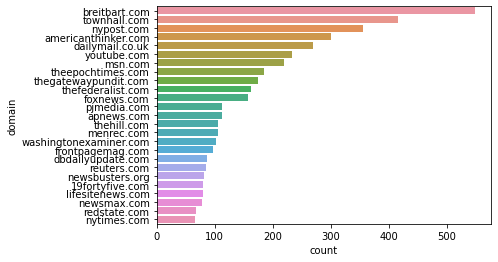

In [9]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

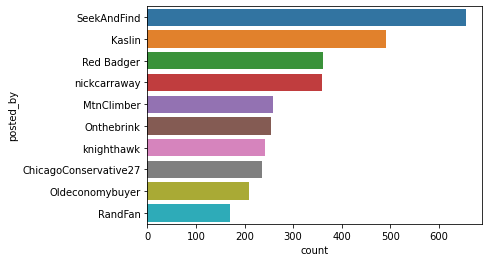

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [ ]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

In [8]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
"Announcement on the Rush Limbaugh show, Rush has passed",2021-02-17 18:06:50,493.0
2021 Super Bowl Kicks Off With ‘Black National Anthem’,2021-02-08 03:47:58,222.0
Patriot Party files FEC notice of joint fundraising with Donald J. Trump for President Inc. (VOA),2021-01-24 23:30:38,217.0
"Q ~ Trust Trump's Plan ~ 01/23/21 Vol.329, Q Day 1184",2021-01-24 10:38:07,208.0
"Reminder: No profanity, no personal attacks, no violence.",2021-01-24 22:45:00,202.0
"Furious Nancy Pelosi crashes press conference to tear into Mitch McConnell, rage at 'cowardly' Republican senators for voting to acquit Trump",2021-02-14 04:43:39,197.0
"'If white people were still here, this wouldn’t happen': the majority-Black town flooded with sewage (Illinois)",2021-02-12 23:29:34,192.0
Ted Cruz: President Trump was “Both Reckless and Irresponsible” and Did Not Prove Election Fraud in Any Court (VIDEO),2021-02-01 09:56:37,183.0
"What happened to ""we caught them all""?",2021-01-21 01:48:56,177.0
